In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot: xlabel='Temperature', ylabel='Revenue'>

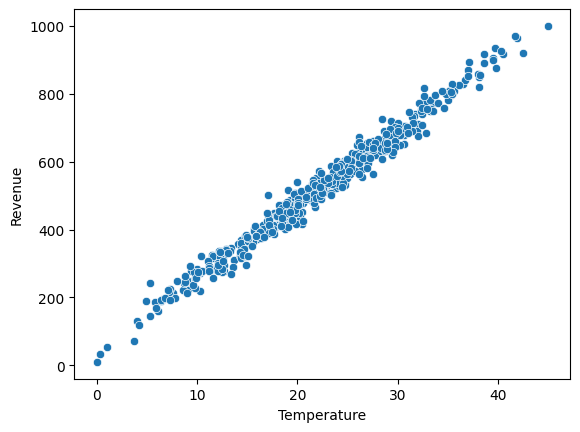

In [8]:
#Importando datos
sales_df = pd.read_csv("datos_de_ventas.csv")

# Visualizacion
sns.scatterplot(x='Temperature', y='Revenue', data=sales_df)

In [14]:
# Creando set de entrenamiento
x_train = sales_df[['Temperature']]  # Utiliza corchetes dobles para seleccionar una columna como DataFrame
y_train = sales_df[['Revenue']]  # Utiliza corchetes dobles para seleccionar una columna como DataFrame


In [15]:
#Creando modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss= 'mean_squared_error')

In [17]:
#Entrenamiento
epochs_hist = model.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 295753.0312
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 255329.4062
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 218537.3125
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 186087.4844
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 157125.1406
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 132159.8281
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 110074.2656
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 91181.6875
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 75005.9297
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 61336.2383
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 49756.0352
Epoch 12/1000
16/16 [==============================] - 0

In [18]:
keys = epochs_hist.history.keys()

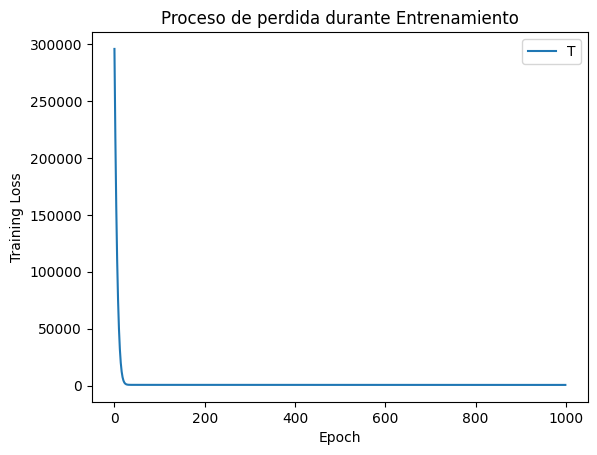

In [19]:
#Grafico de entrenamiento del modelo
plt.plot(epochs_hist.history['loss'])
plt.title('Proceso de perdida durante Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')

In [22]:
weights = model.get_weights()
print(weights)

[array([[21.397818]], dtype=float32), array([44.74459], dtype=float32)]


In [25]:
#Prediccion 
Temp = 80
Revenue = model.predict([Temp])
print("La ganacia segun la red neuronal, sera de: ", Revenue)

1/1 [==============================] - 0s 50ms/step
La ganacia segun la red neuronal, sera de:  [[1756.5701]]


16/16 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Ganacia Generada vs. Temperatura @Empresa de Helados')

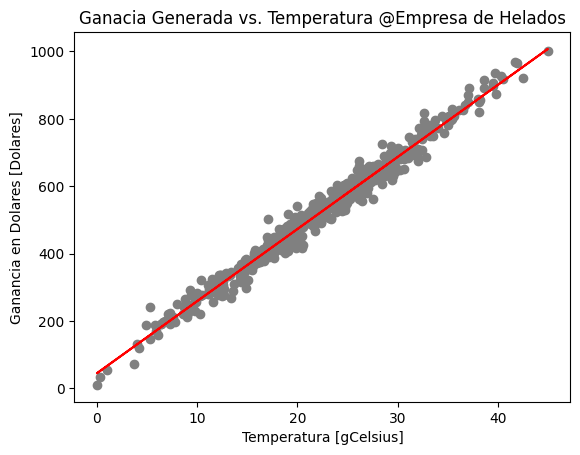

In [26]:
#Grafico de prediccion 
plt.scatter(x_train, y_train, color='gray')
plt.plot(x_train, model.predict(x_train), color='red')
plt.ylabel('Ganancia en Dolares [Dolares]')
plt.xlabel('Temperatura [gCelsius]')
plt.title('Ganacia Generada vs. Temperatura @Empresa de Helados')